In [18]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dff
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium as fl
from folium import plugins
import json
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

In [19]:
df = pd.read_excel('2020년+1월_2월.xls')

In [20]:
df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,20200104,95000,미용/뷰티/위생
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,20200102,2500,분식
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,20200102,7000,분식
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,20200102,8000,분식
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,20200104,17000,분식
...,...,...,...,...,...,...,...,...,...,...,...
65530,CA0000000003,파XXX,하OO,김OO,1984,M,5112102,124155,20200119,400,제과.제빵
65531,CA0000000003,(XXX,하OO,김OO,1984,M,5147264,1059,20200120,8000,일반음식점
65532,CA0000000003,이XXX,하OO,김OO,1984,M,5169341,141828,20200120,5400,편의점
65533,CA0000000003,다XXX,하OO,최OO,1986,F,4884535,123228,20200114,1000,"문구,사무용품"


In [21]:
df['승인일자']=pd.to_datetime(df['승인일자'], format="%Y%m%d")

df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,2020-01-04,95000,미용/뷰티/위생
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,2020-01-02,2500,분식
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,2020-01-02,7000,분식
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,2020-01-02,8000,분식
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,2020-01-04,17000,분식
...,...,...,...,...,...,...,...,...,...,...,...
65530,CA0000000003,파XXX,하OO,김OO,1984,M,5112102,124155,2020-01-19,400,제과.제빵
65531,CA0000000003,(XXX,하OO,김OO,1984,M,5147264,1059,2020-01-20,8000,일반음식점
65532,CA0000000003,이XXX,하OO,김OO,1984,M,5169341,141828,2020-01-20,5400,편의점
65533,CA0000000003,다XXX,하OO,최OO,1986,F,4884535,123228,2020-01-14,1000,"문구,사무용품"


In [22]:
df['요일']=df['승인일자'].dt.day_name()

df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리,요일
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,2020-01-04,95000,미용/뷰티/위생,Saturday
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,2020-01-02,2500,분식,Thursday
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,2020-01-02,7000,분식,Thursday
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,2020-01-02,8000,분식,Thursday
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,2020-01-04,17000,분식,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
65530,CA0000000003,파XXX,하OO,김OO,1984,M,5112102,124155,2020-01-19,400,제과.제빵,Sunday
65531,CA0000000003,(XXX,하OO,김OO,1984,M,5147264,1059,2020-01-20,8000,일반음식점,Monday
65532,CA0000000003,이XXX,하OO,김OO,1984,M,5169341,141828,2020-01-20,5400,편의점,Monday
65533,CA0000000003,다XXX,하OO,최OO,1986,F,4884535,123228,2020-01-14,1000,"문구,사무용품",Tuesday


일자별 거래금액

In [23]:
tmp=df['거래금액'].groupby(df['승인일자']).sum()

In [24]:
df2=dff({'day':tmp.index, 'amount': tmp.values})

df2

,day,amount
0,2020-01-01,83464481
1,2020-01-02,125840897
2,2020-01-03,115260206
3,2020-01-04,114710532
4,2020-01-05,80533810
5,2020-01-06,109304098
6,2020-01-07,104464119
7,2020-01-08,112521003
8,2020-01-09,93662554
9,2020-01-10,92809825


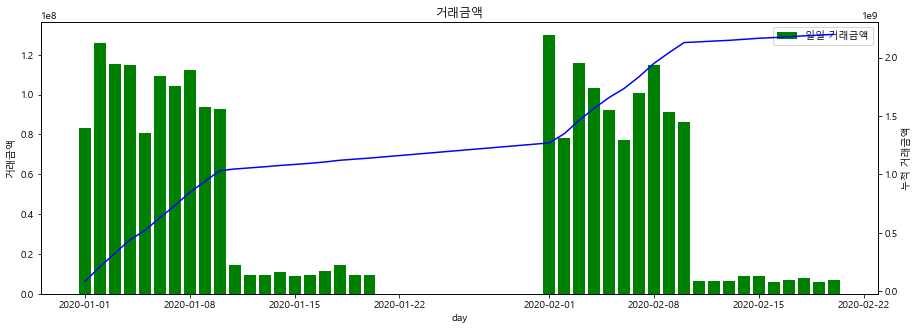

In [25]:
fig, ax0=plt.subplots(figsize=(15, 5))

ax1=ax0.twinx()

ax0.bar(df2['day'], df2['amount'], label='일일 거래금액', color='g')
ax1.plot(df2['day'], df2['amount'].cumsum(), label='누적 거래금액', color='b')

ax0.set_title('거래금액')
ax0.set_xlabel('day')
ax0.set_ylabel('거래금액')
ax0.legend(loc='upper left')

ax1.set_ylabel('누적 거래금액')
ax0.legend(loc='upper right')


<Figure size 288x1296 with 0 Axes>

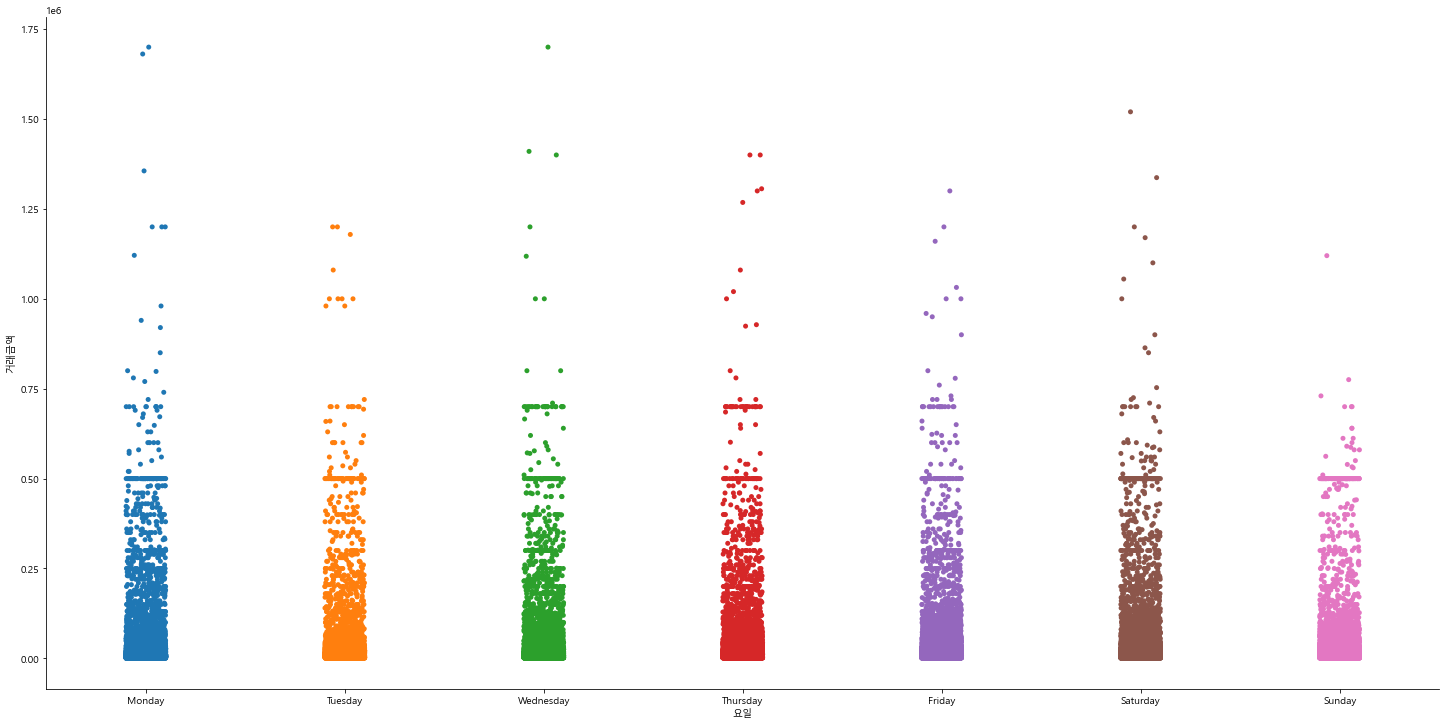

In [26]:
plt.figure(figsize=(4, 18))

weekday_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.catplot(x=df['요일'], y=df['거래금액'], data=df, order=weekday_order, height=10, aspect=2)

<Figure size 1296x288 with 0 Axes>

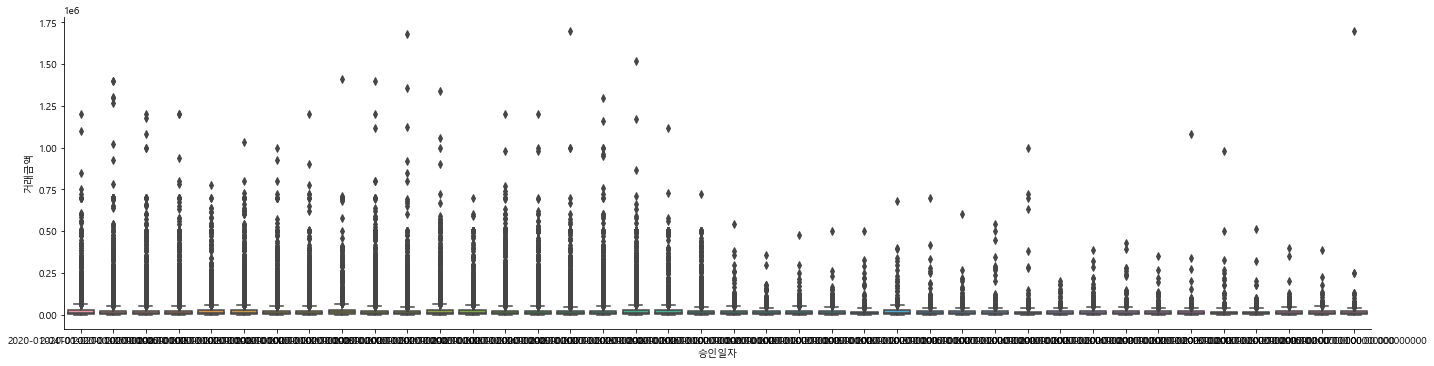

In [27]:
plt.figure(figsize=(18, 4))

sns.catplot(x=df['승인일자'], y=df['거래금액'], data=df, kind='box', height=5, aspect=4)

<Figure size 1296x288 with 0 Axes>

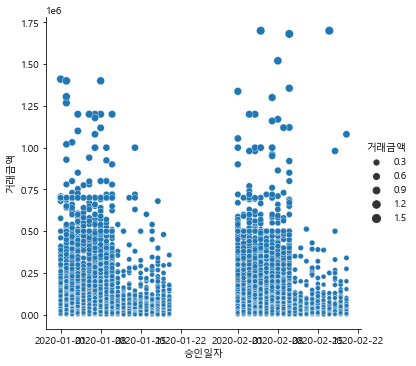

In [28]:
plt.figure(figsize=(18, 4))

sns.relplot(x=df['승인일자'], y=df['거래금액'], data=df, size=df['거래금액'])

생년월일 기준

In [29]:
df['고객 생년월일'].min()

1940

In [30]:
df['고객 생년월일'].max()

2005

In [31]:
tmplist=list(range(1932,2013,10))

tmplist

[1932, 1942, 1952, 1962, 1972, 1982, 1992, 2002, 2012]

In [32]:
tmplist2=list(range(80,9,-10))

tmplist2

[80, 70, 60, 50, 40, 30, 20, 10]

In [33]:
df['연령대']=pd.cut(df['고객 생년월일'], tmplist, right=False, labels=tmplist2)

df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리,요일,연령대
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,2020-01-04,95000,미용/뷰티/위생,Saturday,40
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,2020-01-02,2500,분식,Thursday,50
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,2020-01-02,7000,분식,Thursday,30
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,2020-01-02,8000,분식,Thursday,30
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,2020-01-04,17000,분식,Saturday,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,CA0000000003,파XXX,하OO,김OO,1984,M,5112102,124155,2020-01-19,400,제과.제빵,Sunday,30
65531,CA0000000003,(XXX,하OO,김OO,1984,M,5147264,1059,2020-01-20,8000,일반음식점,Monday,30
65532,CA0000000003,이XXX,하OO,김OO,1984,M,5169341,141828,2020-01-20,5400,편의점,Monday,30
65533,CA0000000003,다XXX,하OO,최OO,1986,F,4884535,123228,2020-01-14,1000,"문구,사무용품",Tuesday,30


In [34]:
tmp2=df['거래금액'].groupby(df['연령대']).sum()

df3=dff(data={'age':tmp2.index , 'amount':tmp2.values})

df3

,age,amount
0,80,37200
1,70,10554210
2,60,108403460
3,50,453297564
4,40,1019983005
5,30,501264042
6,20,100077648
7,10,7164310


<AxesSubplot:xlabel='age', ylabel='amount'>

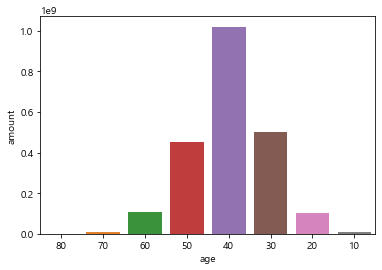

In [35]:
sns.barplot(x=df3['age'], y=df3['amount'])

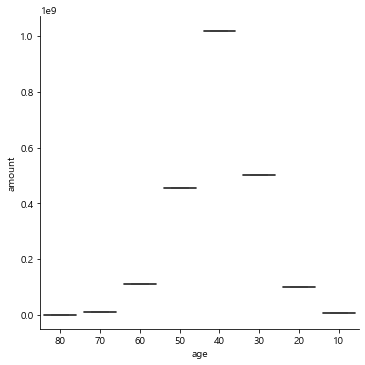

In [36]:
sns.catplot(x='age', y='amount', data=df3, kind='box')

In [37]:
tm=df['연령대'].value_counts()
tmp3=dff(data={'age':tm.index, '건수':tm.values})


tmp3

,age,건수
0,40,27943
1,30,16187
2,50,14453
3,20,3743
4,60,2797
5,70,269
6,10,142
7,80,1


In [38]:
df3=pd.merge(df3, tmp3, on='age')

df3

,age,amount,건수
0,80,37200,1
1,70,10554210,269
2,60,108403460,2797
3,50,453297564,14453
4,40,1019983005,27943
5,30,501264042,16187
6,20,100077648,3743
7,10,7164310,142


In [39]:
for i in range(len(df3)):
    df3.loc[i, 'avg']=round(df3.iloc[i, 1]/df3.iloc[i, 2])

df3

,age,amount,건수,avg
0,80,37200,1,37200.0
1,70,10554210,269,39235.0
2,60,108403460,2797,38757.0
3,50,453297564,14453,31364.0
4,40,1019983005,27943,36502.0
5,30,501264042,16187,30967.0
6,20,100077648,3743,26737.0
7,10,7164310,142,50453.0


<AxesSubplot:xlabel='age', ylabel='avg'>

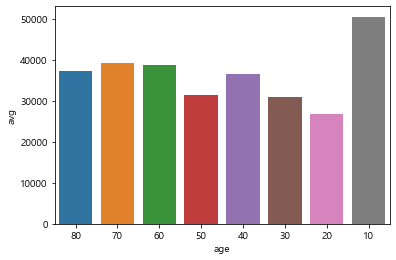

In [40]:
sns.barplot(x=df3['age'], y=df3['avg'])

연령대별 남녀 분리

In [51]:
df2=(df.groupby('연령대').mean()).iloc[:,3]

df2

연령대
80    37200.000000
70    39234.981413
60    38757.046836
50    31363.562167
40    36502.272662
30    30967.074937
20    26737.282394
10    50452.887324
Name: 거래금액, dtype: float64

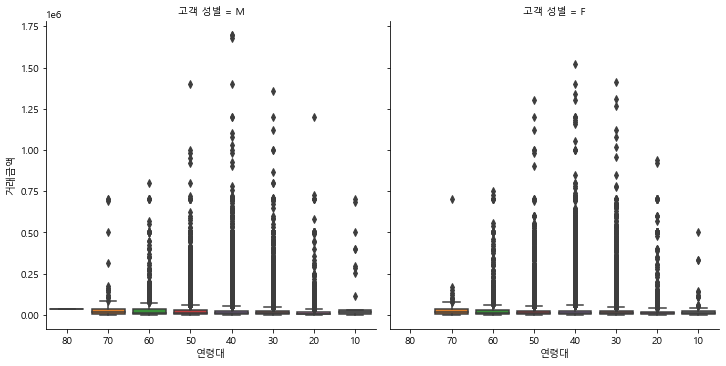

In [55]:
sns.catplot(x='연령대', y='거래금액', data=df, kind='box',col='고객 성별' )

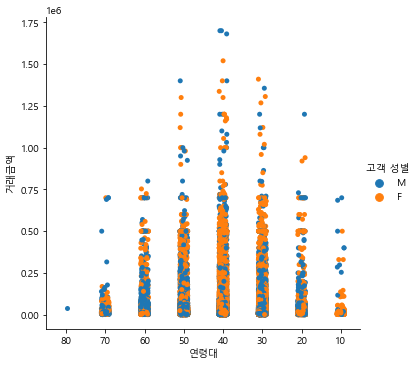

In [43]:
sns.catplot(x='연령대', y='거래금액', data=df, hue='고객 성별')

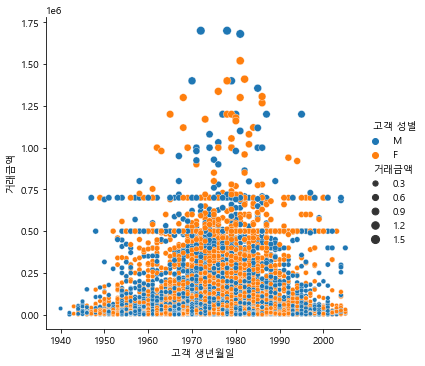

In [44]:
sns.relplot(x="고객 생년월일", y='거래금액', data=df, size='거래금액', hue='고객 성별')